## Теоретическая часть

#### 1. Ответьте на вопросы:  В чем принципиальное отличие гибридных рекомендательных систем от коллаборативной фильтрации?  Приведите 2-3 примера задач, в которых необходимо использовать гибридные системы.  

Коллаборативная фильтрация вырабатывает рекомендации, основанные на модели предшествующего поведения пользователя. Эта модель может быть построена исключительно на основе поведения данного пользователя и с учетом поведения других пользователей со сходными характеристиками.
Гибридные системы - это как правило комбинирование нескольких алгоритмов в рамках одной платформы. Такой подход позволяет минимизировать проблемы, присущие каждому используемому алгоритму в отдельности. Например, комбинируя коллаборативную фильтрацию и контентный подход мы можем избежать ограничений, свойственных каждой из систем в отдельности. 

Построение рекомендаций фильмов, построение рекомендательной системы большого онлайн магазина, построение рекомендательной системы для сервиса, предоставляющего услуги. Во всеъх этих задачах необходимо использовать гибридные системы.

#### 2.  Прочитайте статью про поиск на hh.ru https://habr.com/ru/company/hh/blog/347276/ Нам интересна именно рекомендательная система, раздел "Производительность системы" можно пропустить Какие основные отличия предложенной системы от тех подходов, которые мы разбирали на семинарах? Какие проблемы могут возникнуть при выводе такой модели в продакшен?


В модели используется ранжирование поисковых запросов. Ранжирование состоит из двух частей: линейной, которая отделяет подходящие вакансии от неподходящих и грубо ранжирует неподходящие и XGBoost, которая используется, чтобы более точно ранжировать подходящие. К полученным при ранжировании признакам добвляют признаки, сравнивающие тексты с учётом текстовых взаимодействий. Все это скормливают модели машинного обучения, которая на выходе дает вероятность отклика на вакансию. 

Система состоит из нескольких компонент и ее будет трудно тюнинговать. Так же достаточно трудоемка отладка такой модели и внасение в нее изменений. 

#### 3. На вебинаре мы рассматривали модель LightFM (https://making.lyst.com/lightfm/docs/lightfm.html). В работе Data Scientist'а важную часть занимает research - исследование существующих архитектур и разбор научных статей, в которых они описываются. Вам предлагается изчуть оригинальную статью про LightFM https://arxiv.org/pdf/1507.08439.pdf и ответить на следующие вопросы:  
* 1) Какой датасет используют авторы?  
* 2) Что используют в качестве признаков?  
* 3) С какими моделями сравнивают LightFM? Опишите их основные идеи кратко  

1) первый датасет это рейтинги фильмов с MovieLens, второй датасет состоит из опубликованных вопросов и ответов на CrossValidated.

2) Для первого датасета фильмы описаны по жанрам и снабжены вектором тегов. Каждая пара тег-фильм - это оценка релевантности (от 0 до 1), обозначающая, насколько точно данный тег описывает фильм. Все рейтинги ниже 4,0 (по шкале от 1 до 5) считаем отрицательными; все рейтинги больше или равные 4.0 положительными. Все теги с рейтингами ниже 0,8 отбрасываются для сохранения только наиболее релевантных тегов.

Для второго датасета набор данных состоит из опубликованных вопросов и ответов. Каждый вопрос сопровождается одним или несколькими из 1032 уникальных тегов. Кроме того, есть метаданные пользователя, которые получают из раздела «Обо мне» в профилях пользователей. Цель рекомендации - задать пользователям вопросы, на которые они могут ответить. 

3)Сравнение производится следующимих моделей: 
* MF модель: обычная модель матричной факторизации со смещением для пользователя и смещением для продукта и сигмоидной функцией.
* LSI-LR: модель, основанная на содержании. Матрица, содержащая количество слов в документе (строки представляют уникальные слова, а столбцы представляют каждый документ), строится из большого фрагмента текста. Далее делается SVD разложение этой матрицы для уменьшения количества строк при сохранении структуры сходства среди столбцов. Из разложения берутся скрытые параметры (темы документов). Каждому пользователю соответствует его вектор в пространстве всех тем. Затем по этим данным строится логистическая регрессия для каждого пользователя.
* LSI-UP: гибридная модель, представляющая профили пользователей, как линейные комбинации векторов представляющих внутренние параметры продуктов. К этим векторам применяют скрытую семантическую индексацию (LSI) (фактически SVD разложение) и получают скрытые параметры (векторы) для пользователей и товаров.
* LightFM (tags): модель LightFM, использующая только теги.
* LightFM (tags + ids): модель LightFM, использующая как теги, так и инентификаторы товаров.
* LightFM (tags + about): модель LightFM с использованием как пользовательских так и продуктовых признаков. Пользовательские признаки доступны только для набора данных CrossValidated. Признаки получаются обработкой раздела пользователей "Обо мне" с помощью представления "мешок слов"(HTML очищается от тегов и небуквенных символов, затем преобразовывается в нижний регистр и
токенизируется на пробелах).

## Практическая часть


In [54]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import lightfm
from scipy.sparse import csr_matrix

### 1. Модуль SRC

На вебинаре было рассказано про модуль src. Он приложен в материалах. Скачайте его, изучите структуру, импортируйте функции

In [43]:
# импорт модулей src.utils и src.recommender

from src.utils import precision_at_k, prefilter_items, postfilter_items, popular_items, gen_dicts
from src.recommender import get_similar_items_recommendation, get_similar_users_recommendation

# читаем данные из файла
data = pd.read_csv('retail_train.csv')
item_features = pd.read_csv('product.csv')
user_features = pd.read_csv('hh_demographic.csv')

### 2. Работа с признаками

У нас есть внешние данные. Что с ними не так? Чего не хватает?  

Проведите исследование внешних данных и составьте какие-нибудь содержательные выводы.  
Формально Вам нужно построить 3+ графиков (scatter plot, hist или что-то иное) и описать, что мы видим (например, товары такой-то категории болле часто покупаются в следующие дни недели или пользователи с большим достатком предпочитают такие-то товары).  
Исследуйте те закономерности, которые Вам интересно, чем менее тривиальный вывод получается, тем лучше! 

In [44]:
# column processing
item_features.columns = [col.lower() for col in item_features.columns]
user_features.columns = [col.lower() for col in user_features.columns]

item_features.rename(columns={'product_id': 'item_id'}, inplace=True)
user_features.rename(columns={'household_key': 'user_id'}, inplace=True)

# train test split
test_size_weeks = 3

data_train = data[data['week_no'] < data['week_no'].max() - test_size_weeks]
data_test = data[data['week_no'] >= data['week_no'].max() - test_size_weeks]

data_train.head(2)

,user_id,basket_id,day,item_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.0,1631,1,0.0,0.0


In [45]:
item_features.head(4)

,item_id,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ


In [46]:
user_features.head(4)

,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,user_id
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13


In [47]:
n_items_before = data_train['item_id'].nunique()

data_train = popular_items(data_train)

n_items_after = data_train['item_id'].nunique()
print(f'Decreased # items from {n_items_before} to {n_items_after}')

Decreased # items from 86865 to 5001


In [58]:
data_user_feat = data_train.merge(user_features, on='user_id', how='left')
#data_user_feat
sales_for_week = data_user_feat.groupby('week_no')['sales_value'].sum()

In [59]:
data_user_feat

,user_id,basket_id,day,item_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278485,222,41297772783,635,1120741,1,0.59,304,0.00,1716,91,0.0,0.0,35-44,A,35-49K,Unknown,2 Adults No Kids,2,None/Unknown
2278486,462,41297773713,635,999999,1,1.99,304,0.00,2040,91,0.0,0.0,65+,U,100-124K,Unknown,Single Male,1,None/Unknown
2278487,462,41297773713,635,995242,1,1.00,304,-0.89,2040,91,0.0,0.0,65+,U,100-124K,Unknown,Single Male,1,None/Unknown
2278488,462,41297773713,635,10180324,1,3.00,304,-0.29,2040,91,0.0,0.0,65+,U,100-124K,Unknown,Single Male,1,None/Unknown


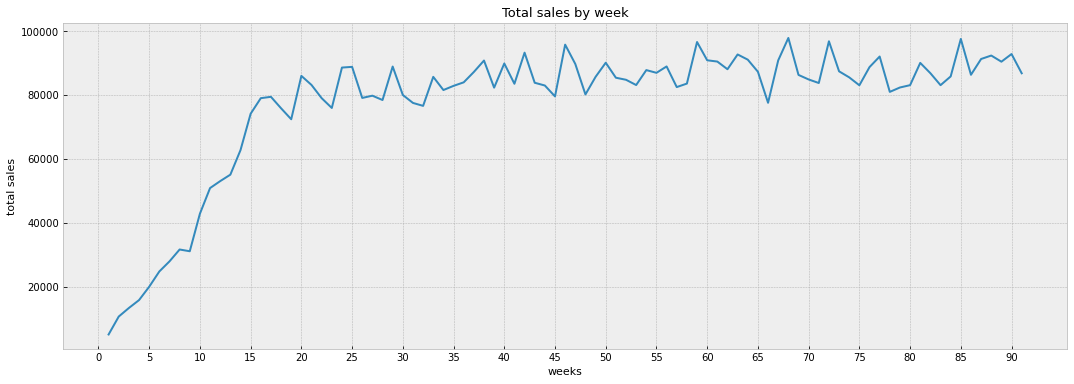

In [131]:
#суммарные продажи по неделям
plt.figure(figsize=(18, 6))
with plt.style.context('bmh'):
    plt.plot(sales_for_week)
    plt.title('Total sales by week', fontsize=13)
    plt.xticks(range(0,95,5))
    plt.xlabel('weeks', fontsize=11)
    plt.ylabel('total sales', fontsize=11)
    
plt.show()

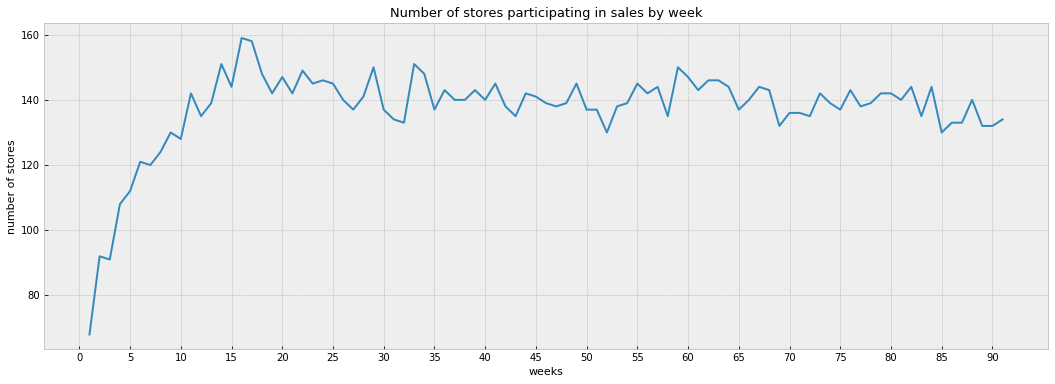

In [132]:
#количество работающих магазинов по неделям
n_stores_for_week = data_user_feat.groupby('week_no')['store_id'].nunique()

plt.figure(figsize=(18, 6))
with plt.style.context('bmh'):
    plt.plot(n_stores_for_week)
    plt.title('Number of stores participating in sales by week', fontsize=13)
    plt.xticks(range(0,95,5))
    plt.xlabel('weeks', fontsize=11)
    plt.ylabel('number of stores', fontsize=11)
plt.show()
    

Видим, что регулярные продажи начались с 15 недели (вероятно, что до 15 недели было открытие новых магазинов). Это подтверждается графиком количества продававших продукцию магазинов по неделям. 

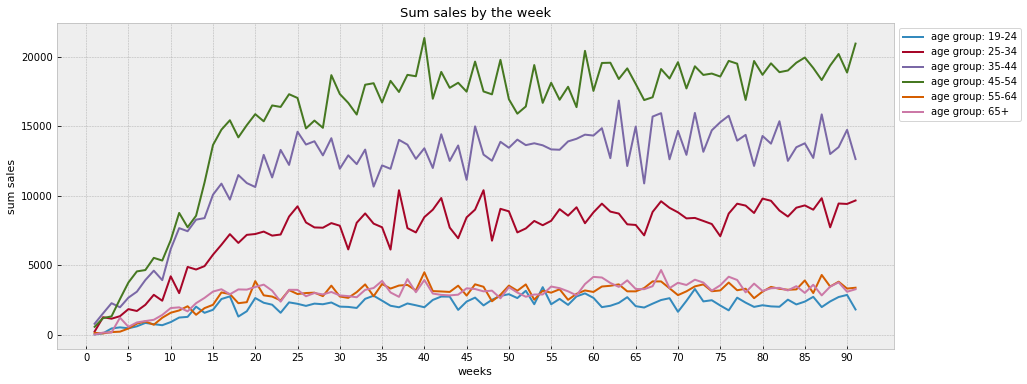

In [133]:
age_desc = sorted(user_features['age_desc'].unique())

plt.figure(figsize=(15, 6))

with plt.style.context('bmh'):
    for age_group in age_desc:
        age_sales_for_week = data_user_feat.loc[data_user_feat['age_desc']==age_group].groupby('week_no')['sales_value'].sum()
        plt.plot(age_sales_for_week, label=f'age group: {age_group}')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title('Sum sales by the week', fontsize=13)
plt.xticks(range(0,95,5))
plt.xlabel('weeks', fontsize=11)
plt.ylabel('sum sales', fontsize=11)


plt.show()

Видим, что самые активные (с точки зрения покупательной способности) группы пользователей - это пользователи из следующих возрастных категорий (в порядке убывания активности): 45-54, 35-44, 25-34 

In [130]:
data_item_feat = data_train.merge(item_features, on='item_id', how='left')
data_item_feat.head(3)

,user_id,basket_id,day,item_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0.0,0.0,69.0,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1033142,1,0.82,364,0.0,1631,1,0.0,0.0,2.0,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
2,2375,26984851472,1,1036325,1,0.99,364,-0.3,1631,1,0.0,0.0,69.0,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,


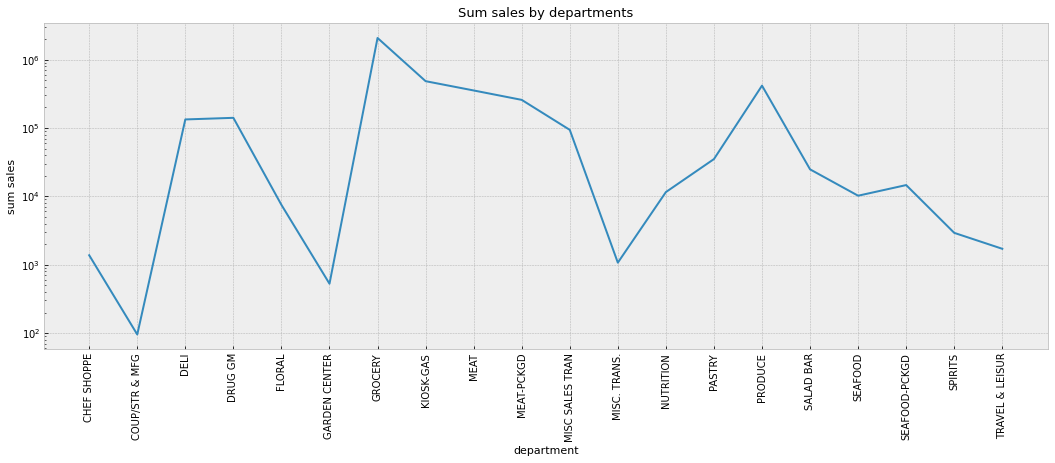

In [179]:
plt.figure(figsize=(18, 6))

with plt.style.context('bmh'):
    department_sales = data_item_feat.groupby('department')['sales_value'].sum()
    plt.plot(department_sales)

plt.title('Sum sales by departments', fontsize=13)
plt.xlabel('department', fontsize=11)
plt.ylabel('sum sales', fontsize=11)
plt.yscale('log')
plt.xticks(rotation = 90, va="top")

plt.show()

In [167]:
# Количество типов популярных товаров
data_item_feat['department'].nunique()

20

In [168]:
# Количество типов всех товаров
item_features['department'].nunique()

44

В перечень топ-5000 товаров (после обработки данных) не попала примерно половина типов товаров. Среди топ-5000 товаров самые продаваемые типы товаров: бакалея (grocery),  мясо (meat) и топливо (kiosk-gas).

In [40]:
user_item_matrix = pd.pivot_table(data_train, 
                                  index='user_id', columns='item_id', 
                                  values='quantity', 
                                  aggfunc='mean', 
                                  fill_value=0
                                 )

user_item_matrix = user_item_matrix.astype(float) # необходимый тип матрицы для implicit

# переведем в формат sparse matrix
sparse_user_item = csr_matrix(user_item_matrix).tocsr()

user_item_matrix.head(4)

item_id,202291,397896,420647,480014,545926,707683,731106,818980,819063,819227,...,15778533,15831255,15926712,15926775,15926844,15926886,15927403,15927661,15927850,16809471
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
user_group = data_train.groupby('user_id')['sales_value'].sum()
user_group

### 3. LightFM

У этого алогритма есть множество параметров (item/user_alpha, loss, no_components).  
Проведите эксперименты аналогично дз 3 (подберите гипперпараметры каким удобно способои и постройте графики)  
На выходе необходимо получить pr@5 на валидации (последние 3 недели) > 2%  

У Вас, скорее всего, возникнет проблема со временем обучения. Почему они возникает?    

Попробуйте запустить алгоритм вообще без фичей или используйте только признаки с небольшим числом уникальных категорий. (item_features['commodity_desc'].unique() - 300 уникальных категорий - это очень много)

### *Отбор признаков* * 

Все данные категориальные, при ohe кодировании для товаров признаков становится невероятно много.      
Какие стратегии отбора признаков в классическом ML Вы знаете? Применимы ли они тут?  

Попробйте какие-нибудь стратегии. Удалось ли улучшить качество?

 \* *задание необязательно*
